# Notebook to create synthetic dataset
The trajectories for this dataset are generated inspired by the social force model. The idea is that the pedestrians are operating in a given environment that is defined in meters on a ground plane.  Each pedestrian has a random goal somewhere in this environment and starts at a random point in this environment. The trajectory is then given by the pedestrian trying to reach the goal with small variations in speed and direction to make it more realistic. Overall differerent behaviours are generated by different pedestrian speeds. The rest is all made from assumptions for the open space scenario.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

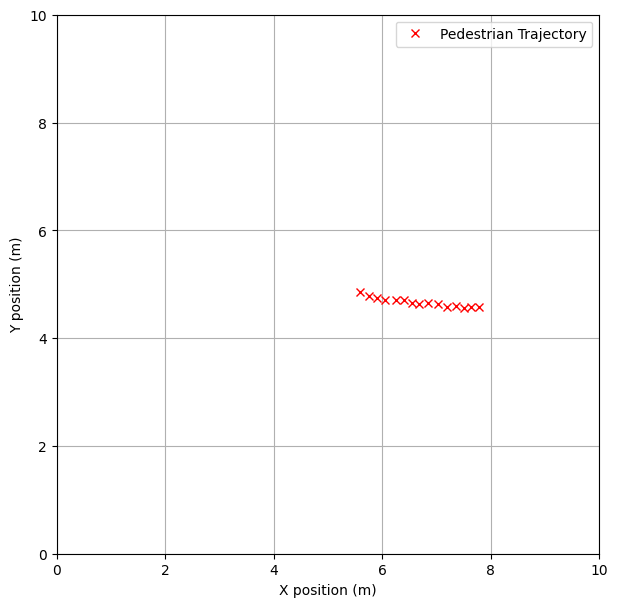

In [12]:
def create_traj(dataset_size):
    """
    Create a dataset of trajctories as numpy array of shape (dataset_size,15,2) by moving a pedestrian towards a goal and recording
    the intermediate steps. save the dataset as pandas dataframe with null values as skeletal keypoints to match the real dataset structure.

    :param: dataset_size the size that the dataset should have

    :returns pandas dataframe with dataset_size trajectoreis of length 15 for positions and skeletal keypoints
    """
    # time step as 0.4 seconds similar to JRDB
    dt = 0.4
    env_size = 8.0
    
    traj_dict = tensor_dict = collections.defaultdict(dict)

    for i in range(dataset_size):
        # total time in seconds, corresponds to 15 timesteps
        total_time = 6
        # base speed of pedestrian in m/s
        base_speed = np.random.choice([0.2, 0.4, 0.6]) 
        # different amounts of noise for direction
        noise_strength = np.random.choice([0.05,0.1, 0.15])  
        # different amounts of noise for speed
        speed_variation_strength = np.random.choice([0.02,0.05,0.1])
        
        # Initialize positions (x, y) for pedestrian in environment
        pedestrian_pos = np.random.uniform(0, env_size, 2)

        # Set internal goal - twice as wide as env to not be hit in the given time
        pedestrian_goal = np.random.uniform(0, env_size*2, 2)

        pedestrian_trajectory = []
        robot_trajectory = []
        #relative_trajectory = []

        def move_pedestrian(ped_pos, goal_pos, speed, dt):
            """
            Move pedestrian motivated to hit the goal and by applying noise in direction and speed.

            :param ped_pos: pedestrian position at current timestep
            :param goal_pos: position of the goal
            :param speed: speed of the pedestrian in m/s
            :param dt: timestep

            :returns new position as (x,y)
            """
            # Get directionn towards goal
            direction = goal_pos - ped_pos
            distance_to_goal = np.linalg.norm(direction)
            if distance_to_goal > 0:
                direction = direction / distance_to_goal  # Normalize to get unit vector
            
            # Add noise to the direction for more realistic movement
            noise = np.random.normal(0, noise_strength, 2)
            direction += noise
            direction = direction / np.linalg.norm(direction)
            
            # Apply speed variations
            speed += np.random.normal(0, speed_variation_strength)
            speed = max(0, speed)
            
            # Compute new position
            new_position = ped_pos + direction * speed * dt
            return new_position

        # Generate trajectory
        for t in np.arange(0, total_time, dt):
            pedestrian_pos = move_pedestrian(pedestrian_pos, pedestrian_goal, base_speed, dt)
            #relative_pos = pedestrian_pos - robot_pos
            pedestrian_trajectory.append(pedestrian_pos.copy())
            #relative_trajectory.append(relative_pos.copy())
            
        pedestrian_trajectory = np.array(pedestrian_trajectory)
        robot_trajectory = np.array(robot_trajectory)
        traj_dict[i] = {'positions': pedestrian_trajectory,
                      'poses': np.zeros([pedestrian_trajectory.shape[0], 17,3])}
        #relative_trajectory = np.array(relative_trajectory)
    new_df = pd.DataFrame.from_dict(tensor_dict, orient='index')
    return new_df

def plot_traj(df, index):
    """ 
    Plot sample synthetic trajectory of the dataframe from the index.

    :param df: dataframe with position and pose trajectories
    :param index: index of dataframe to plot

    """

    pedestrian_trajectory = df.iloc[index]['positions']

    # Plot trajectories
    plt.figure(figsize=(7, 7))
    plt.plot(pedestrian_trajectory[:, 0], pedestrian_trajectory[:, 1], 'rx', label='Pedestrian Trajectory')
    #plt.plot(pedestrian_goal[0], pedestrian_goal[1], 'ro', label='Pedestrian Goal')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.legend()
    plt.xlabel("X position (m)")
    plt.ylabel("Y position (m)")
    plt.grid()
    plt.show()

df = create_traj(1)
plot_traj(df,0)